In [1]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('heesoo37/120-years-of-olympic-history-athletes-and-results', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results


In [4]:
data_original = pd.read_csv('data/athlete_events.csv', sep=',')
data = data_original.copy()

In [5]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
data.tail(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
# Prints random 5 rows from the dataset
data.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
102196,51696,Doina Ignat,F,39.0,181.0,81.0,Romania,ROU,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Women's Coxed Eights,Bronze
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
253799,127086,"Kathleen ""Kathy"" Vogt (-Gregg)",F,20.0,165.0,57.0,Canada,CAN,1980 Winter,1980,Winter,Lake Placid,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
180756,90845,"Donald Robert ""Don"" Palmer",M,NaN,NaN,NaN,Australia,AUS,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxless Pairs,NaN
206496,103658,Ricardo Antonio Rusticucci Fernndez,M,46.0,180.0,78.0,Argentina,ARG,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN


In [8]:
print(f'Rows: {data.shape[0]}')
print(f'Columns: {data.shape[1]}')

Rows: 271116
Columns: 15


In [9]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())

In [11]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
data.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,271116.000000,271116.00000,271116.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.33897,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.280857,9.27810,12.574690,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.00000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,22.000000,170.00000,63.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,25.000000,175.33897,70.702393,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,180.00000,75.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
data.duplicated().sum()

np.int64(1385)

In [15]:
data.loc[data.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,175.33897,70.702393,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
# Correlation Analysis
numerical_data = data.select_dtypes(include=['number'])

In [19]:
numerical_data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002825,-0.009791,-0.008059,0.011381
Age,-0.002825,1.000000,0.111115,0.168071,-0.088250
Height,-0.009791,0.111115,1.000000,0.786635,0.030126
Weight,-0.008059,0.168071,0.786635,1.000000,0.011598
Year,0.011381,-0.088250,0.030126,0.011598,1.000000


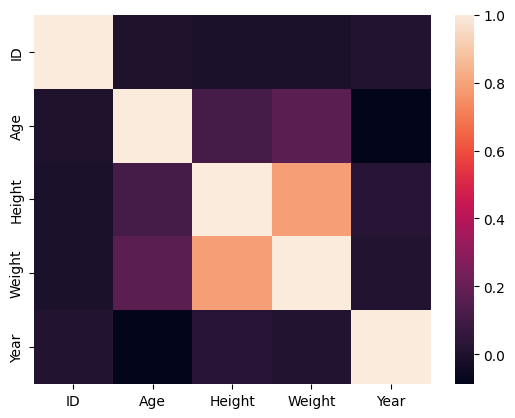

In [20]:
sns.heatmap(numerical_data.corr())
plt.show()

In [21]:
# Categorical Data
data['Sex'].value_counts()

Sex
M    195353
F     74378
Name: count, dtype: int64

In [22]:
gen_dist = data['Sex'].value_counts()

In [23]:
gen_dist.index

Index(['M', 'F'], dtype='object', name='Sex')

In [24]:
gen_dist.values

array([195353,  74378])

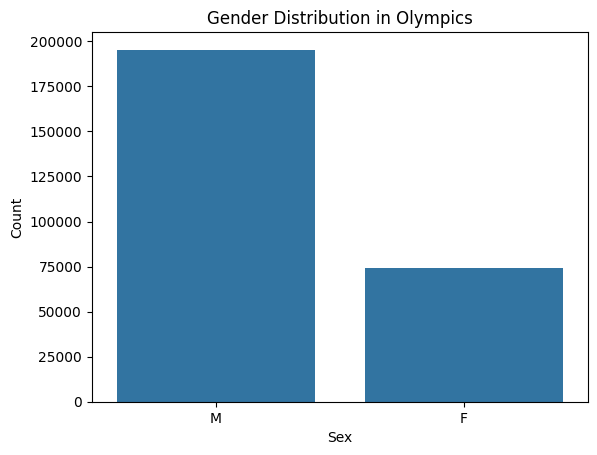

In [25]:
sns.barplot(x=gen_dist.index, y=gen_dist.values)
plt.ylabel("Count")
plt.title("Gender Distribution in Olympics")
plt.show()

In [26]:
top_10 = data['Sport'].value_counts().sort_values(ascending=False).head(10)

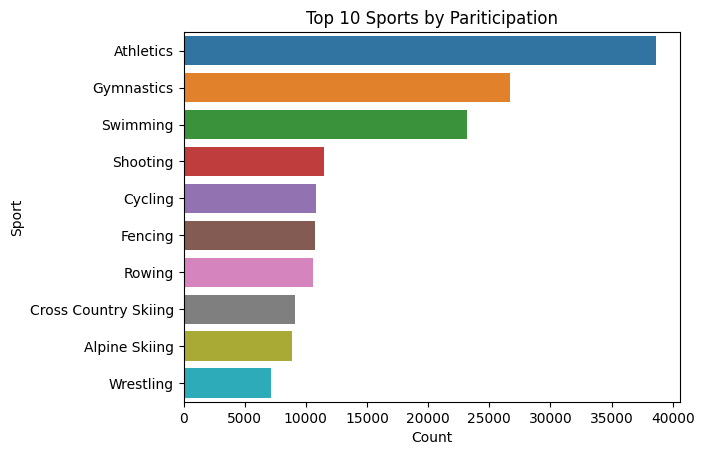

In [27]:
sns.barplot(x=top_10.values, y=top_10.index, palette='tab10')
plt.ylabel("Sport")
plt.xlabel('Count')
plt.title("Top 10 Sports by Pariticipation")
plt.show()

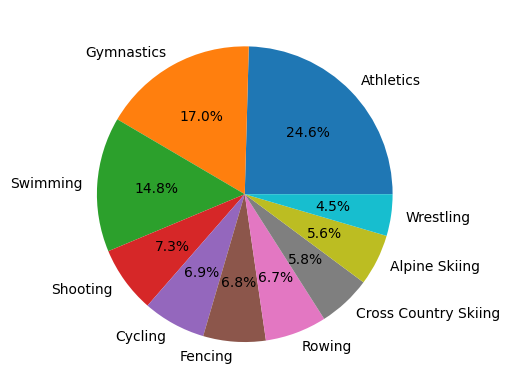

In [28]:
top_10.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [29]:
# Returns the index of the max value in the column
data['Sport'].value_counts().idxmax()

'Athletics'

In [30]:
# Numerical Data
data['Age'].describe()

count    269731.000000
mean         25.458303
std           6.056530
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

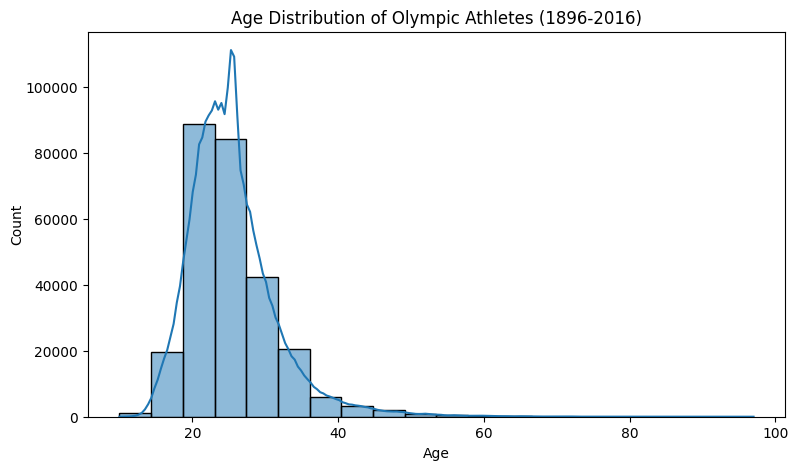

In [ ]:
# Histogram
plt.figure(figsize=(9,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.ylabel("Count", labelpad=1)
plt.title('Age Distribution of Olympic Athletes')
plt.savefig('plots/age_dist', dpi=300, bbox_inches='tight')



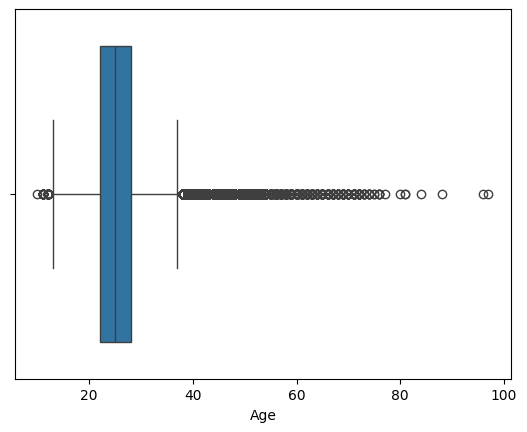

In [32]:
sns.boxplot(x=data['Age'])
plt.show()

In [33]:
# Means right skewed
data['Age'].skew()

np.float64(1.5877141959478505)

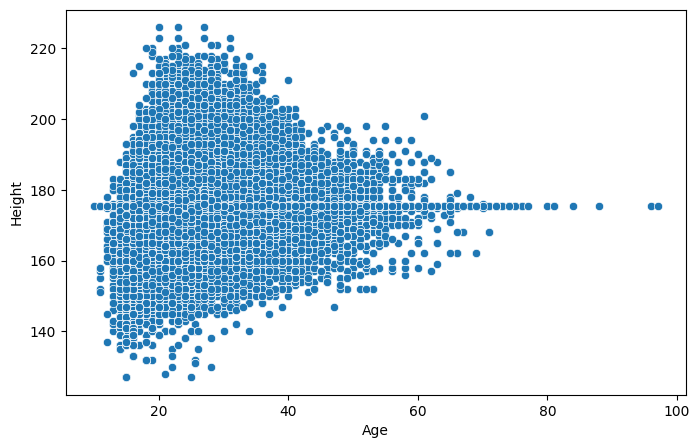

In [34]:
# Bivariate and Multivariate Analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Height', data=data)
plt.show()

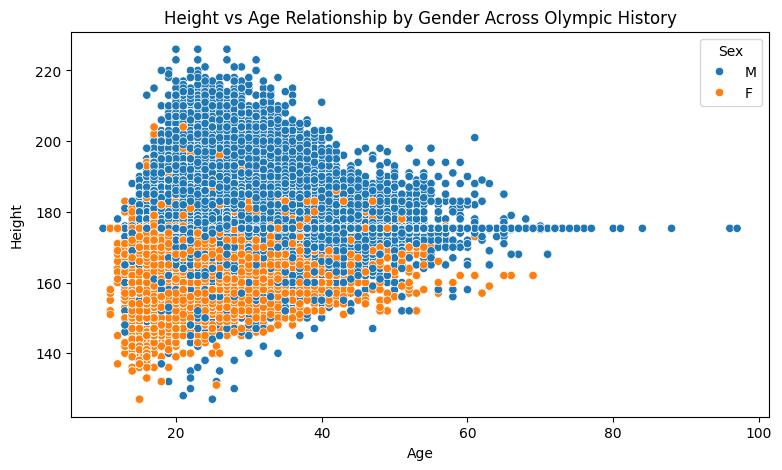

In [61]:
plt.figure(figsize=(9,5))
plt.title('Height vs Age Relationship by Gender Across Olympic History')
plt.ylabel('Height', labelpad=8)
sns.scatterplot(x='Age', y='Height', hue = 'Sex', data=data)
plt.savefig('plots/scatterplot', dpi=300, bbox_inches='tight')

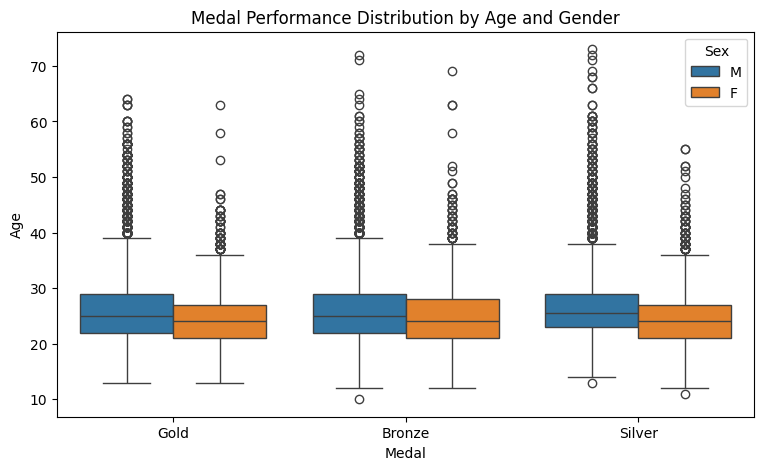

In [57]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Medal', y='Age', hue='Sex', data=data, palette='tab10')
plt.title('Medal Performance Distribution by Age and Gender')
plt.savefig('plots/boxplot', dpi=300, bbox_inches='tight')

In [37]:
contigency_table = pd.crosstab(data['Sex'], data['Medal'])
contigency_table

Medal,Bronze,Gold,Silver
Sex,,,
F,3771,3747,3735
M,9524,9622,9373


In [38]:
df_canada = data.loc[data['Team'] == 'Canada']

In [39]:
canada_medal = df_canada.groupby('Year')['Medal'].count()

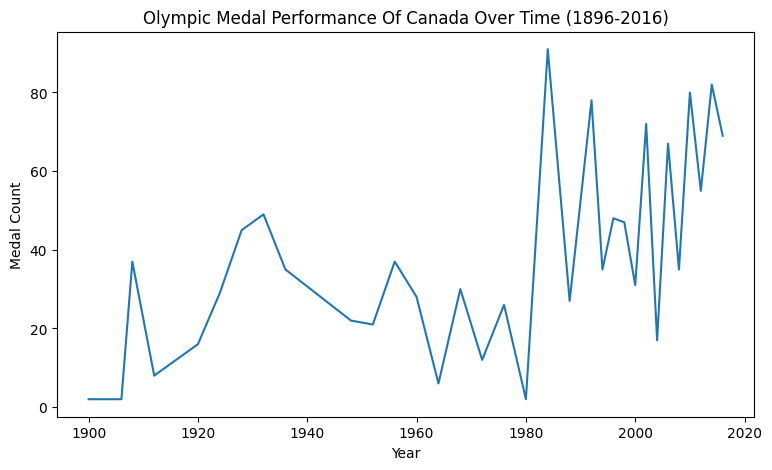

In [ ]:
plt.figure(figsize=(9,5))
sns.lineplot(x=canada_medal.index, y=canada_medal.values)
plt.ylabel('Medal Count')
plt.title('Olympic Medal Performance Of Canada Over Time')
plt.savefig('plots/line', dpi=300, bbox_inches='tight')

In [41]:
medal_counts = data['Name'].value_counts().reset_index()
medal_counts

,Name,count
0,Heikki Ilmari Savolainen,39
1,"Joseph ""Josy"" Stoffel",38
2,Ioannis Theofilakis,36
3,Takashi Ono,33
4,Alexandros Theofilakis,32
...,...,...
134727,Yuliya Anatolivna Kalina,1
134728,Milan Kalina,1
134729,Jozef Kalina,1
134730,estmr Kalina,1


In [42]:
medal_counts.columns = ['Athlete', 'Medal Count']

In [43]:
# medal_counts.head(10)
medal_counts['Athlete']

0         Heikki Ilmari Savolainen
1            Joseph "Josy" Stoffel
2              Ioannis Theofilakis
3                      Takashi Ono
4           Alexandros Theofilakis
                    ...           
134727    Yuliya Anatolivna Kalina
134728                Milan Kalina
134729                Jozef Kalina
134730                estmr Kalina
134731     Pierre-Georges LeClercq
Name: Athlete, Length: 134732, dtype: object

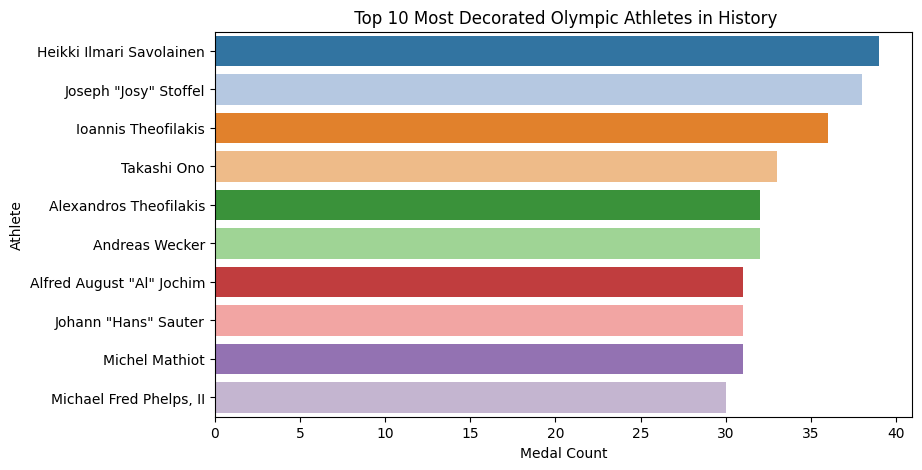

In [58]:
plt.figure(figsize=(9,5))
sns.barplot(x="Medal Count", y='Athlete', data=medal_counts.head(10), palette='tab20')
plt.title(' Top 10 Most Decorated Olympic Athletes in History')
plt.savefig('plots/top10', dpi=300, bbox_inches='tight')

In [45]:
medal_count_per_city = data.groupby(['City','Medal']).size().unstack()
medal_count_per_city.head()

Medal,Bronze,Gold,Silver
City,,,
Albertville,106,104,108
Amsterdam,250,245,239
Antwerpen,367,493,448
Athina,860,883,859
Atlanta,629,608,605
